# Análise de Dados - Base Manga Produtos

## Estrutura da Análise

1. **Exploração Inicial e Data Contract**
2. **Análise Exploratória (Univariada)**
3. **Tratamento dos Dados** 
4. **Análise de Relacionamentos (Bivariada/Multivariada)**
5. **Insights e Recomendações**
6. **Entrega**

---

# ETAPA 1: Exploração Inicial e Data Contract

**Objetivo**: Compreender a estrutura e qualidade inicial dos dados.

In [1]:
# Importações necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Configurações de visualização
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Bibliotecas importadas com sucesso!")

Bibliotecas importadas com sucesso!


In [2]:
# Carregar o dataset
df = pd.read_csv('BASE_1_Manga_Produtos.csv')

print(f"Dataset carregado: {df.shape[0]} linhas e {df.shape[1]} colunas")
print(f"\nPrimeiras linhas:")
df.head()

Dataset carregado: 1700 linhas e 15 colunas

Primeiras linhas:


,empresa,faturamento_empresa_brl,produto,tipo_cliente,mercado_principal,indice_concorrencia_1a5,indice_valor_agregado_1a5,margem_media_percentual,indice_complexidade_produtiva_1a5,indice_capex_1a5,indice_escalabilidade_1a5,indice_exigencia_regulatoria_1a5,certificacoes_principais,indice_compatibilidade_refugo_1a5,indice_compatibilidade_operacao_fazenda_1a5
0,BRF Ingredients,5.300000e+10,Sorbet / picolé,B2B,Interno,2.0,3.5,45.66,4.0,1.0,1.0,3.0,ANVISA,2.0,1.0
1,Ambev (bebidas),7.200000e+10,Purê de manga asséptico,B2C,NaN,2.0,3.0,12.79,3.0,1.0,3.0,3.0,ANVISA,1.0,2.0
2,Bunge Brasil,9.500000e+10,Biocomposto / fertilizante orgânico,B2B,Externo,4.0,2.0,12.31,2.0,3.0,3.0,2.0,ANVISA,3.0,2.0
3,MangaVale Alimentos,4.800000e+08,Sabonete / hidratante com manga,B2B,Ambos,1.0,2.5,37.29,3.0,2.0,NaN,2.0,MAPA,2.0,2.0
4,Cutrale,3.000000e+10,Corante natural,B2B,Interno,3.0,3.5,13.45,4.0,2.0,4.0,3.0,MAPA,2.0,4.0


In [3]:
# Informações gerais do dataset
print("=== INFORMAÇÕES GERAIS DO DATASET ===")
print(f"\nDimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")
print(f"\nTipos de dados:")
print(df.dtypes)
print(f"\n\nInformações sobre o DataFrame:")
df.info()

=== INFORMAÇÕES GERAIS DO DATASET ===

Dimensões: 1700 linhas x 15 colunas

Tipos de dados:
empresa                                         object
faturamento_empresa_brl                        float64
produto                                         object
tipo_cliente                                    object
mercado_principal                               object
indice_concorrencia_1a5                        float64
indice_valor_agregado_1a5                      float64
margem_media_percentual                        float64
indice_complexidade_produtiva_1a5              float64
indice_capex_1a5                               float64
indice_escalabilidade_1a5                      float64
indice_exigencia_regulatoria_1a5               float64
certificacoes_principais                        object
indice_compatibilidade_refugo_1a5              float64
indice_compatibilidade_operacao_fazenda_1a5    float64
dtype: object


Informações sobre o DataFrame:
<class 'pandas.core.frame.DataFrame'

In [4]:
# Verificar valores nulos
print("=== VALORES NULOS POR COLUNA ===")
valores_nulos = df.isnull().sum()
percentual_nulos = (valores_nulos / len(df)) * 100

df_nulos = pd.DataFrame({
    'Coluna': valores_nulos.index,
    'Quantidade Nulos': valores_nulos.values,
    'Percentual (%)': percentual_nulos.values.round(2)
})
df_nulos = df_nulos[df_nulos['Quantidade Nulos'] > 0].sort_values('Quantidade Nulos', ascending=False)

print(df_nulos.to_string(index=False))
print(f"\nTotal de linhas: {len(df)}")

=== VALORES NULOS POR COLUNA ===
                                     Coluna  Quantidade Nulos  Percentual (%)
                  indice_valor_agregado_1a5                98            5.76
                                    produto                94            5.53
                                    empresa                91            5.35
                           indice_capex_1a5                91            5.35
                               tipo_cliente                90            5.29
                  indice_escalabilidade_1a5                90            5.29
          indice_compatibilidade_refugo_1a5                87            5.12
                    indice_concorrencia_1a5                84            4.94
                          mercado_principal                80            4.71
                   certificacoes_principais                79            4.65
                    margem_media_percentual                79            4.65
          indice_complexidade_p

In [5]:
df.isna().sum().sum()


np.int64(1253)

In [6]:
# Verificar duplicatas
duplicatas = df.duplicated().sum()
print(f"=== DUPLICATAS ===")
print(f"Total de linhas duplicadas: {duplicatas}")

if duplicatas > 0:
    print("\nLinhas duplicadas:")
    print(df[df.duplicated(keep=False)])

=== DUPLICATAS ===
Total de linhas duplicadas: 0


In [7]:
# Data Contract - Documentação das Variáveis
print("=== DATA CONTRACT ===")
print("\nDocumentação das Variáveis:\n")

data_contract = {
    'Variável': [
        'empresa',
        'faturamento_empresa_brl',
        'produto',
        'tipo_cliente',
        'mercado_principal',
        'indice_concorrencia_1a5',
        'indice_valor_agregado_1a5',
        'margem_media_percentual',
        'indice_complexidade_produtiva_1a5',
        'indice_capex_1a5',
        'indice_escalabilidade_1a5',
        'indice_exigencia_regulatoria_1a5',
        'certificacoes_principais',
        'indice_compatibilidade_refugo_1a5',
        'indice_compatibilidade_operacao_fazenda_1a5'
    ],
    'Tipo': [
        'Categórica',
        'Numérico Contínuo',
        'Categórica',
        'Categórica Binária',
        'Categórica',
        'Numérico Discreto',
        'Numérico Discreto',
        'Numérico Contínuo',
        'Numérico Discreto',
        'Numérico Discreto',
        'Numérico Discreto',
        'Numérico Discreto',
        'Categórica',
        'Numérico Discreto',
        'Numérico Discreto'
    ],
    'Descrição': [
        'Nome da empresa',
        'Faturamento da empresa em BRL',
        'Tipo de produto derivado de manga',
        'Tipo de cliente: B2B ou B2C',
        'Mercado principal: Interno, Externo ou Ambos',
        'Índice de concorrência (escala 1-5)',
        'Índice de valor agregado (escala 1-5)',
        'Margem média percentual (0-100%)',
        'Índice de complexidade produtiva (escala 1-5)',
        'Índice de capex (escala 1-5)',
        'Índice de escalabilidade (escala 1-5)',
        'Índice de exigência regulatória (escala 1-5)',
        'Tipo de certificação principal',
        'Índice de compatibilidade com refugo (escala 1-5)',
        'Índice de compatibilidade com operação de fazenda (escala 1-5)'
    ],
    'Faixa Esperada': [
        'Texto livre',
        'Valores positivos',
        'Texto livre',
        'B2B ou B2C',
        'Interno, Externo ou Ambos',
        '1 a 5',
        '1 a 5',
        '0 a 100',
        '1 a 5',
        '1 a 5',
        '1 a 5',
        '1 a 5',
        'ANVISA, MAPA, Internacional, ISO/HACCP, Nenhuma',
        '1 a 5',
        '1 a 5'
    ]
}

df_contract = pd.DataFrame(data_contract)
print(df_contract.to_string(index=False))

=== DATA CONTRACT ===

Documentação das Variáveis:

                                   Variável               Tipo                                                      Descrição                                  Faixa Esperada
                                    empresa         Categórica                                                Nome da empresa                                     Texto livre
                    faturamento_empresa_brl  Numérico Contínuo                                  Faturamento da empresa em BRL                               Valores positivos
                                    produto         Categórica                              Tipo de produto derivado de manga                                     Texto livre
                               tipo_cliente Categórica Binária                                    Tipo de cliente: B2B ou B2C                                      B2B ou B2C
                          mercado_principal         Categórica                

In [8]:
# Verificar valores únicos das variáveis categóricas
print("=== VALORES ÚNICOS - VARIÁVEIS CATEGÓRICAS ===")

categoricas = ['empresa', 'produto', 'tipo_cliente', 'mercado_principal', 'certificacoes_principais']

for col in categoricas:
    print(f"\n{col}:")
    print(f"  Total de valores únicos: {df[col].nunique()}")
    print(f"  Valores únicos: {df[col].unique()[:10].tolist()}")  # Mostra primeiros 10
    if df[col].nunique() > 10:
        print(f"  ... e mais {df[col].nunique() - 10} valores")

=== VALORES ÚNICOS - VARIÁVEIS CATEGÓRICAS ===

empresa:
  Total de valores únicos: 18
  Valores únicos: ['BRF Ingredients', 'Ambev (bebidas)', 'Bunge Brasil', 'MangaVale Alimentos', 'Cutrale', 'AgroDoce Nordeste', 'VerdePulp Brasil', 'NordFruit Export', 'Fazenda Sol do Vale', nan]
  ... e mais 8 valores

produto:
  Total de valores únicos: 29
  Valores únicos: ['Sorbet / picolé', 'Purê de manga asséptico', 'Biocomposto / fertilizante orgânico', 'Sabonete / hidratante com manga', 'Corante natural', 'Óleo / manteiga de semente de manga', nan, 'Ração / ingrediente para ração animal', 'Base para néctar', 'Manga desidratada em pedaços']
  ... e mais 19 valores

tipo_cliente:
  Total de valores únicos: 2
  Valores únicos: ['B2B', 'B2C', nan]

mercado_principal:
  Total de valores únicos: 3
  Valores únicos: ['Interno', nan, 'Externo', 'Ambos']

certificacoes_principais:
  Total de valores únicos: 5
  Valores únicos: ['ANVISA', 'MAPA', 'Internacional', 'Nenhuma', 'ISO/HACCP', nan]


---

# ETAPA 2: Análise Exploratória (Univariada)

**Objetivo**: Entender o comportamento individual de cada variável.

In [9]:
# Coeficiente de Variação (CV)
print("=== COEFICIENTE DE VARIAÇÃO ===")
print("CV = (desvio padrão / média) × 100\n")

# Definir variáveis numéricas
numericas = df.select_dtypes(include=[np.number]).columns.tolist()

cv_results = []
for col in numericas:
    if df[col].notna().sum() > 0:
        media = df[col].mean()
        if media != 0:
            cv = (df[col].std() / media) * 100
            cv_results.append({
                'Variável': col,
                'Média': round(media, 2),
                'Desvio Padrão': round(df[col].std(), 2),
                'CV (%)': round(cv, 2)
            })

df_cv = pd.DataFrame(cv_results)
df_cv = df_cv.sort_values('CV (%)', ascending=False)
print(df_cv.to_string(index=False))
print("\n* CV alto indica alta variabilidade")
print("* CV baixo indica baixa variabilidade")

=== COEFICIENTE DE VARIAÇÃO ===
CV = (desvio padrão / média) × 100

                                   Variável        Média  Desvio Padrão  CV (%)
                    faturamento_empresa_brl 4.091450e+10   8.104544e+10  198.08
          indice_compatibilidade_refugo_1a5 2.300000e+00   1.260000e+00   54.63
indice_compatibilidade_operacao_fazenda_1a5 2.580000e+00   1.260000e+00   48.99
                           indice_capex_1a5 2.820000e+00   1.230000e+00   43.50
           indice_exigencia_regulatoria_1a5 2.770000e+00   1.190000e+00   42.88
                    indice_concorrencia_1a5 2.980000e+00   1.140000e+00   38.34
                    margem_media_percentual 2.835000e+01   1.071000e+01   37.77
                  indice_escalabilidade_1a5 3.040000e+00   1.140000e+00   37.50
          indice_complexidade_produtiva_1a5 3.040000e+00   1.120000e+00   36.82
                  indice_valor_agregado_1a5 2.910000e+00   8.000000e-01   27.70

* CV alto indica alta variabilidade
* CV baixo indi

=== HISTOGRAMAS - DISTRIBUIÇÕES ===


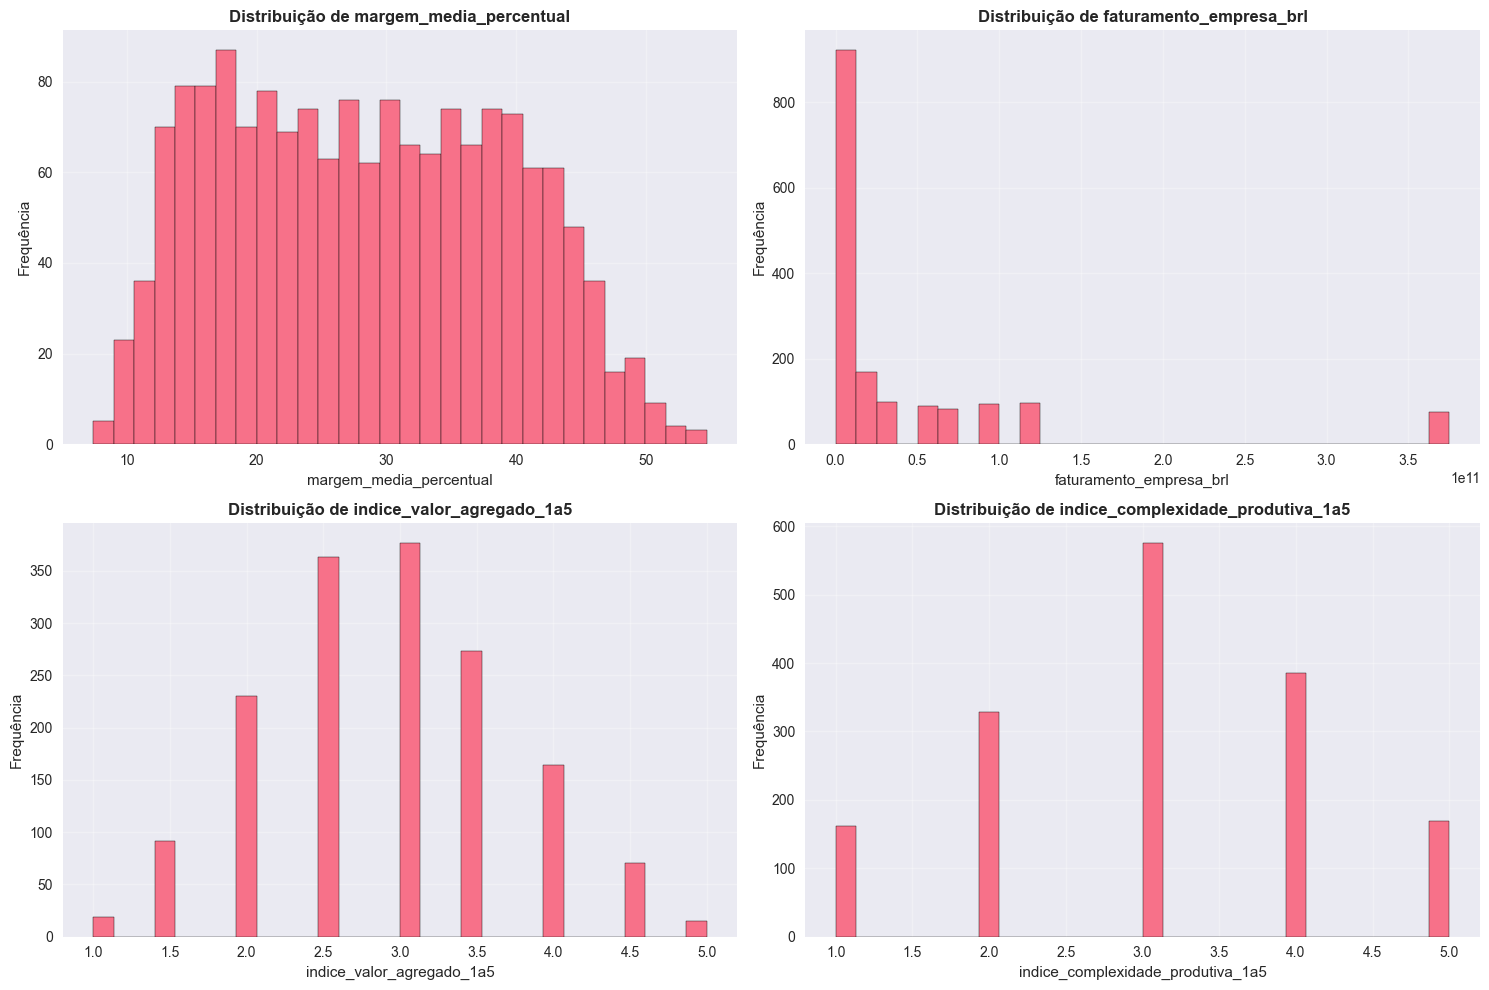

In [10]:
# Histogramas para variáveis numéricas principais
print("=== HISTOGRAMAS - DISTRIBUIÇÕES ===")

# Selecionar algumas variáveis principais para visualização
vars_principais = ['margem_media_percentual', 'faturamento_empresa_brl', 
                   'indice_valor_agregado_1a5', 'indice_complexidade_produtiva_1a5']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, var in enumerate(vars_principais):
    if var in df.columns:
        df[var].hist(bins=30, ax=axes[idx], edgecolor='black')
        axes[idx].set_title(f'Distribuição de {var}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(var)
        axes[idx].set_ylabel('Frequência')
        axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

=== DISTRIBUIÇÃO DE FREQUÊNCIAS DOS ÍNDICES ===

Gráficos de barras mostram melhor a distribuição de dados discretos



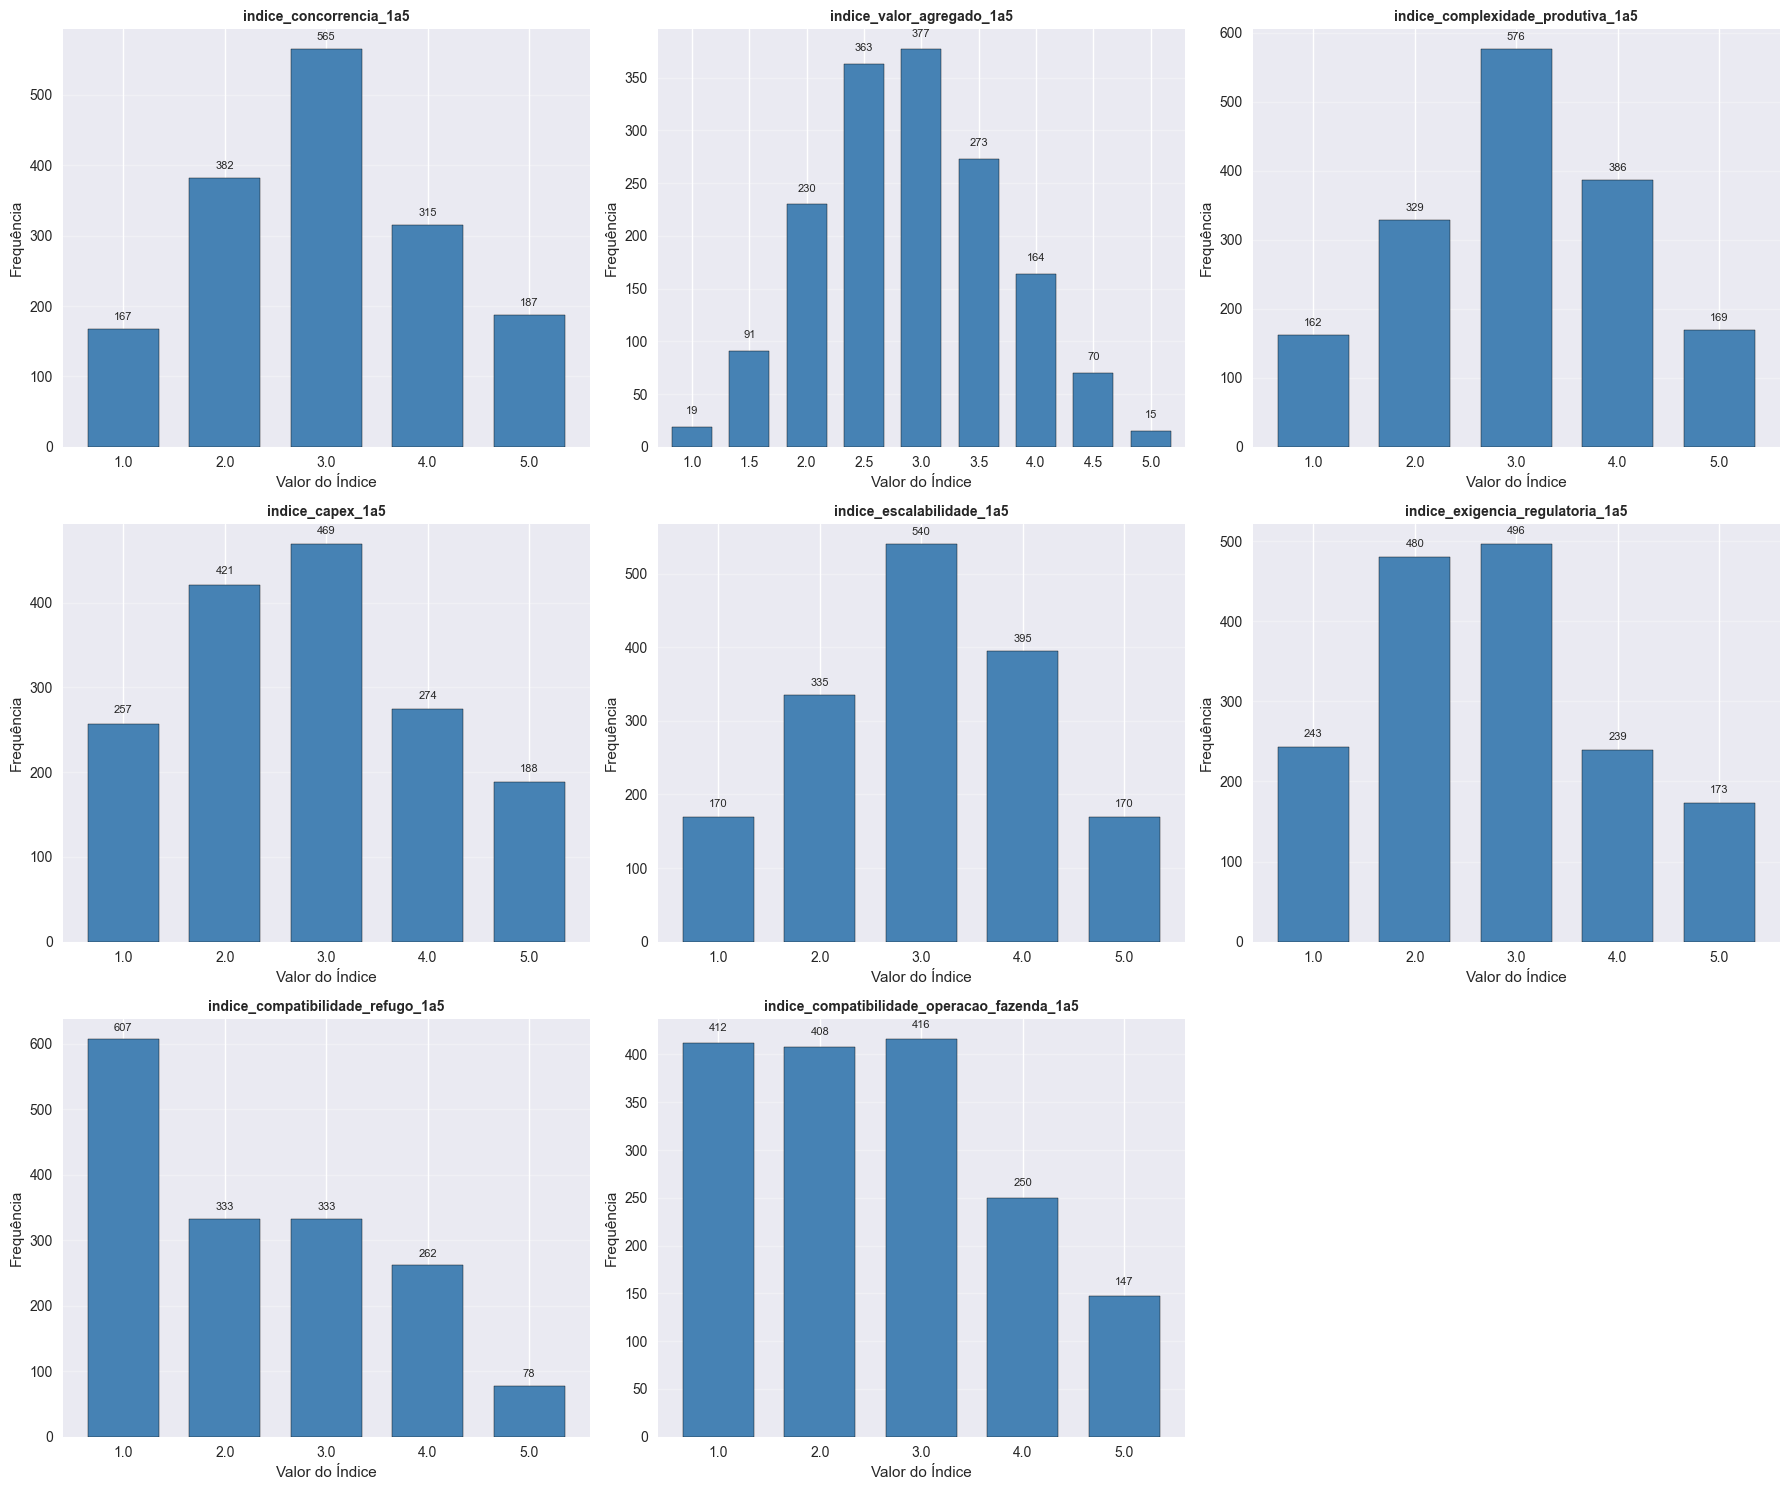

In [11]:
# Visualização alternativa: Distribuição de frequências dos índices
print("=== DISTRIBUIÇÃO DE FREQUÊNCIAS DOS ÍNDICES ===\n")
print("Gráficos de barras mostram melhor a distribuição de dados discretos\n")

# Selecionar índices
indices = [col for col in df.columns if 'indice' in col and '1a5' in col]

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, var in enumerate(indices[:9]):  # Primeiros 9 índices
    if var in df.columns:
        # Contar frequências
        freq = df[var].value_counts().sort_index()
        
        # Gráfico de barras
        freq.plot(kind='bar', ax=axes[idx], color='steelblue', edgecolor='black', width=0.7)
        axes[idx].set_title(f'{var}', fontsize=10, fontweight='bold')
        axes[idx].set_xlabel('Valor do Índice')
        axes[idx].set_ylabel('Frequência')
        axes[idx].set_xticklabels(axes[idx].get_xticklabels(), rotation=0)
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Adicionar valores nas barras
        for i, v in enumerate(freq.values):
            axes[idx].text(i, v + 10, str(v), ha='center', va='bottom', fontsize=8)

# Remover eixos vazios
for idx in range(len(indices[:9]), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

=== VIOLIN PLOTS - DISTRIBUIÇÃO DOS ÍNDICES ===

Violin plots mostram a densidade da distribuição



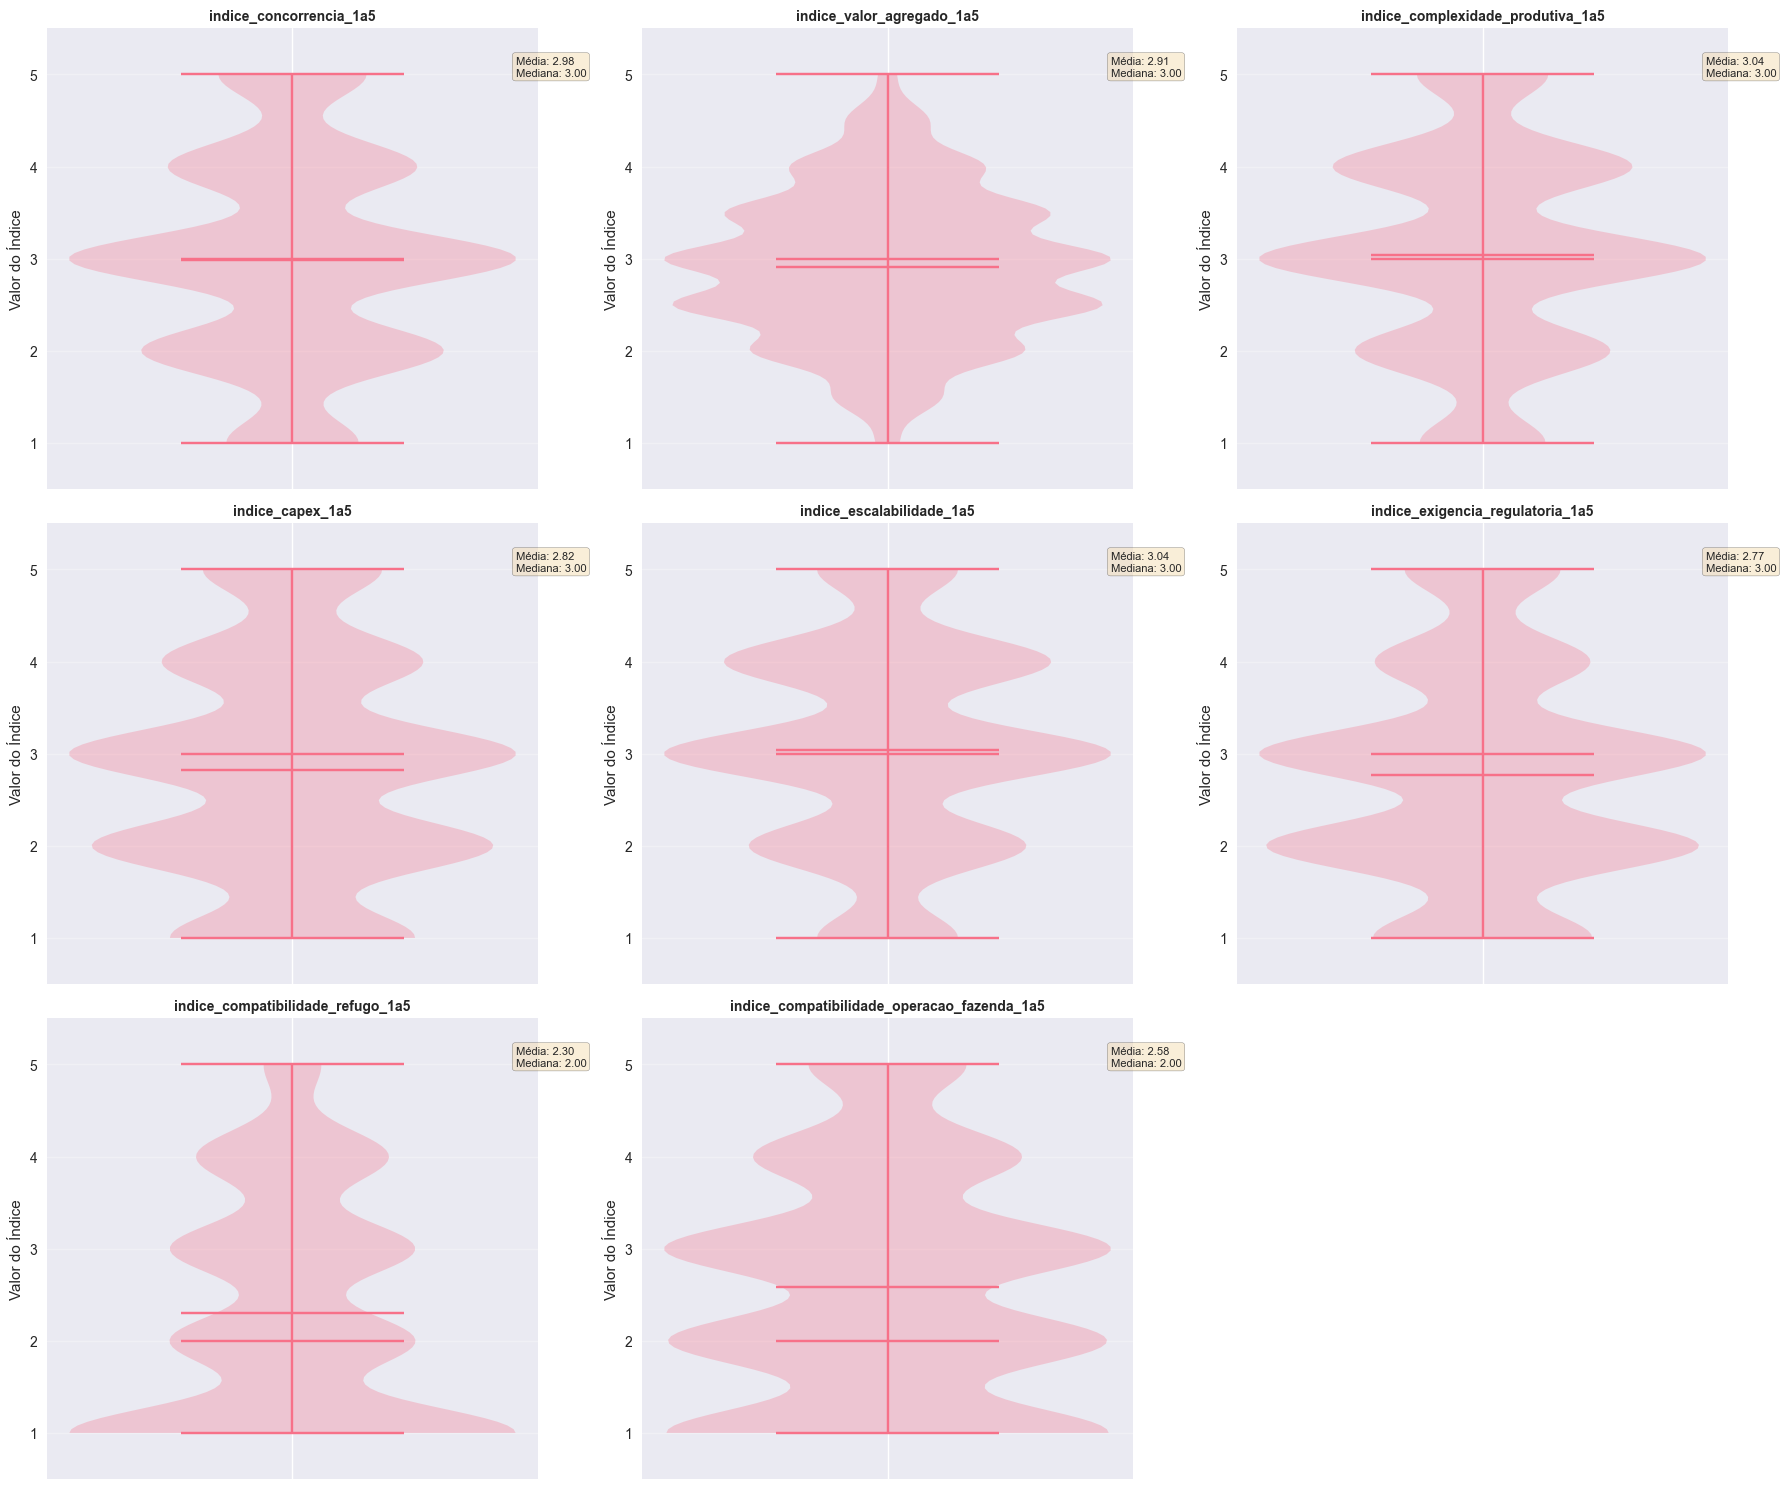

In [12]:
# Violin plots - melhor visualização para dados discretos com baixa variabilidade
print("=== VIOLIN PLOTS - DISTRIBUIÇÃO DOS ÍNDICES ===\n")
print("Violin plots mostram a densidade da distribuição\n")

fig, axes = plt.subplots(3, 3, figsize=(18, 15))
axes = axes.ravel()

for idx, var in enumerate(indices[:9]):
    if var in df.columns:
        # Filtrar valores não nulos
        dados = df[var].dropna()
        
        # Violin plot
        parts = axes[idx].violinplot([dados], positions=[0], widths=0.6, showmeans=True, showmedians=True)
        axes[idx].set_title(f'{var}', fontsize=10, fontweight='bold')
        axes[idx].set_ylabel('Valor do Índice')
        axes[idx].set_ylim(0.5, 5.5)
        axes[idx].set_xticks([0])
        axes[idx].set_xticklabels([''])
        axes[idx].grid(True, alpha=0.3, axis='y')
        
        # Adicionar estatísticas
        media = dados.mean()
        mediana = dados.median()
        axes[idx].text(0.3, 5.2, f'Média: {media:.2f}\nMediana: {mediana:.2f}', 
                      fontsize=8, verticalalignment='top',
                      bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Remover eixos vazios
for idx in range(len(indices[:9]), 9):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Resumo estatístico dos índices
print("=== RESUMO ESTATÍSTICO DOS ÍNDICES ===\n")

resumo_indices = []
for var in indices:
    if var in df.columns:
        dados = df[var].dropna()
        resumo_indices.append({
            'Índice': var.replace('indice_', '').replace('_1a5', ''),
            'Média': round(dados.mean(), 2),
            'Mediana': round(dados.median(), 2),
            'Desvio Padrão': round(dados.std(), 2),
            'Min': int(dados.min()),
            'Max': int(dados.max()),
            'Valores Únicos': dados.nunique(),
            'Moda': int(dados.mode()[0]) if len(dados.mode()) > 0 else None,
            'N Observações': len(dados)
        })

df_resumo = pd.DataFrame(resumo_indices)
print(df_resumo.to_string(index=False))

=== RESUMO ESTATÍSTICO DOS ÍNDICES ===

                          Índice  Média  Mediana  Desvio Padrão  Min  Max  Valores Únicos  Moda  N Observações
                    concorrencia   2.98      3.0           1.14    1    5               5     3           1616
                  valor_agregado   2.91      3.0           0.80    1    5               9     3           1602
          complexidade_produtiva   3.04      3.0           1.12    1    5               5     3           1622
                           capex   2.82      3.0           1.23    1    5               5     3           1609
                  escalabilidade   3.04      3.0           1.14    1    5               5     3           1610
           exigencia_regulatoria   2.77      3.0           1.19    1    5               5     3           1631
          compatibilidade_refugo   2.30      2.0           1.26    1    5               5     1           1613
compatibilidade_operacao_fazenda   2.58      2.0           1.26    1    

In [14]:
# Análise de variáveis categóricas
print("=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===\n")

# Tipo de Cliente
print("1. Tipo de Cliente:")
print(df['tipo_cliente'].value_counts())
print(f"\nPercentual:\n{df['tipo_cliente'].value_counts(normalize=True) * 100}\n")

# Mercado Principal
print("\n2. Mercado Principal:")
print(df['mercado_principal'].value_counts())
print(f"\nPercentual:\n{df['mercado_principal'].value_counts(normalize=True) * 100}\n")

# Certificações
print("\n3. Certificações Principais:")
print(df['certificacoes_principais'].value_counts())
print(f"\nPercentual:\n{df['certificacoes_principais'].value_counts(normalize=True) * 100}\n")

=== ANÁLISE DE VARIÁVEIS CATEGÓRICAS ===

1. Tipo de Cliente:
tipo_cliente
B2B    1177
B2C     433
Name: count, dtype: int64

Percentual:
tipo_cliente
B2B    73.10559
B2C    26.89441
Name: proportion, dtype: float64


2. Mercado Principal:
mercado_principal
Interno    823
Externo    419
Ambos      378
Name: count, dtype: int64

Percentual:
mercado_principal
Interno    50.802469
Externo    25.864198
Ambos      23.333333
Name: proportion, dtype: float64


3. Certificações Principais:
certificacoes_principais
MAPA             416
Nenhuma          407
ISO/HACCP        323
ANVISA           319
Internacional    156
Name: count, dtype: int64

Percentual:
certificacoes_principais
MAPA             25.663171
Nenhuma          25.107958
ISO/HACCP        19.925972
ANVISA           19.679210
Internacional     9.623689
Name: proportion, dtype: float64



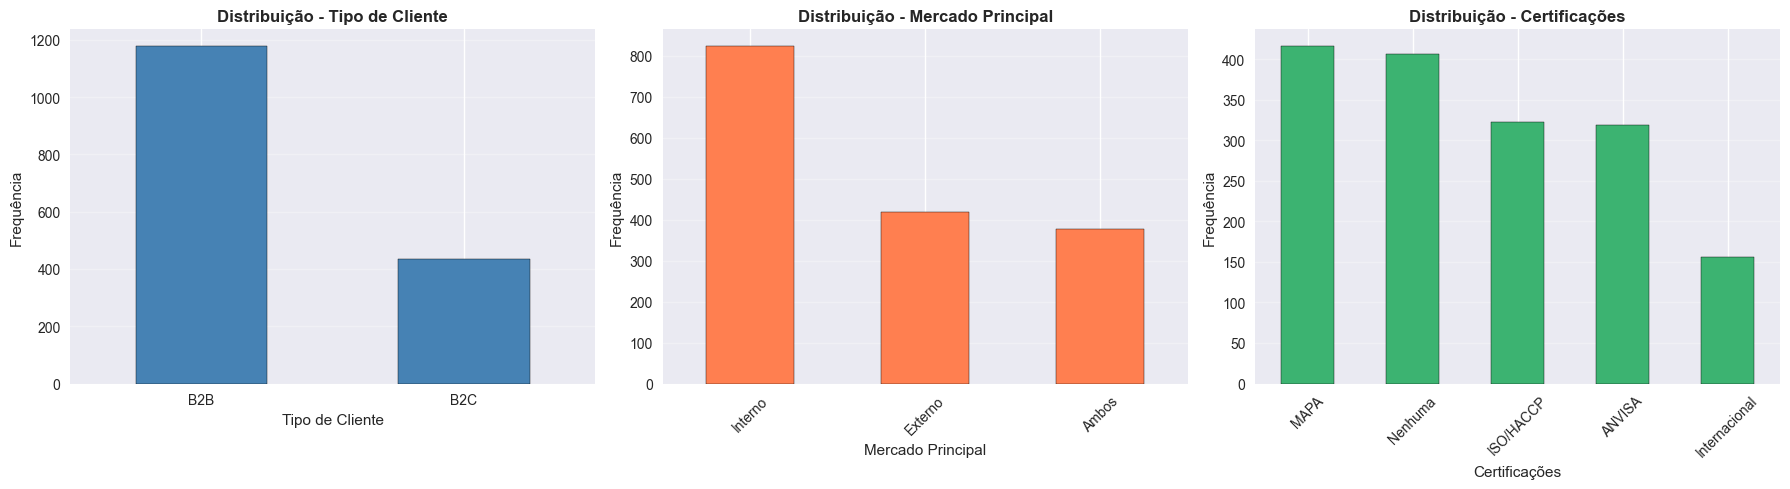

In [15]:
# Gráficos de barras para variáveis categóricas
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tipo de Cliente
df['tipo_cliente'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue', edgecolor='black')
axes[0].set_title('Distribuição - Tipo de Cliente', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Tipo de Cliente')
axes[0].set_ylabel('Frequência')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(True, alpha=0.3, axis='y')

# Mercado Principal
df['mercado_principal'].value_counts().plot(kind='bar', ax=axes[1], color='coral', edgecolor='black')
axes[1].set_title('Distribuição - Mercado Principal', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Mercado Principal')
axes[1].set_ylabel('Frequência')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')

# Certificações
df['certificacoes_principais'].value_counts().plot(kind='bar', ax=axes[2], color='mediumseagreen', edgecolor='black')
axes[2].set_title('Distribuição - Certificações', fontsize=12, fontweight='bold')
axes[2].set_xlabel('Certificações')
axes[2].set_ylabel('Frequência')
axes[2].tick_params(axis='x', rotation=45)
axes[2].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()